# Pre-processing notebook

In [1]:
#necessary imports
import pandas as pd
import cv2
import data_utils as du
import matplotlib.pyplot as plt

In [2]:
#load final dataset 
final = pd.read_csv('csv_files/input_dataset.csv') 

In [3]:
final.describe()

xmin         ymin         xmax         ymax        score  \
count  4663.000000  4663.000000  4663.000000  4663.000000  4663.000000   
mean   1786.694511  1791.680810  2068.869754  2078.698020     0.386675   
std    1124.145885  1118.824132  1123.731353  1124.067341     0.135369   
min       0.000000     0.000000   107.836571   109.524689     0.200119   
25%     820.834656   834.636902  1112.384765  1123.100158     0.268605   
50%    1741.220947  1757.494263  2049.079346  2040.152710     0.363504   
75%    2721.508423  2735.388672  2998.063476  3035.515014     0.486236   
max    3895.628174  3891.397217  4000.000000  4000.000000     0.829151   

        tile_index     tile_xmin     tile_ymin     tile_xmax     tile_ymax  \
count  4663.000000   4663.000000   4663.000000   4663.000000   4663.000000   
mean      7.264637   5258.770105   4876.932018   9258.770105   8876.932018   
std       4.854366   3847.221231   3382.289628   3847.221231   3382.289628   
min       0.000000      0.000000      0.000000   4000.000000   4000.000000   
25%       4.000000   3800.000000   3800.000000   7800.000000   7800.000000   
50%       6.000000   3800.000000   3800.000000   7800.000000   7800.000000   
75%      10.000000   7600.000000   7600.000000  11600.000000  11600.000000   
max      22.000000  13134.000000  11578.000000  17134.000000  15578.000000   

       ...         year      tree_id  is_musacea_g           X_g  \
count  ...  4663.000000  4663.000000   4663.000000   4663.000000   
mean   ...  2016.990564   146.271713      0.322539   7576.838368   
std    ...     0.985261   203.643468      0.467498   2239.344659   
min    ...  2016.000000     0.000000      0.000000   1988.220761   
25%    ...  2016.000000     0.000000      0.000000   5877.062136   
50%    ...  2017.000000     0.000000      0.000000   7415.304527   
75%    ...  2018.000000   397.000000      1.000000   9152.983965   
max    ...  2019.000000   543.000000      1.000000  14021.142010   

                Y_g  updated diameter  updated height          AGB  \
count   4663.000000       4663.000000     4663.000000  4663.000000   
mean    6546.210331          9.251859        2.821102    13.041779   
std     1964.451886          4.931596       36.944663    54.505322   
min     1884.593530          0.318309        0.000000     0.003780   
25%     5063.183875          6.111536        0.000000     4.493912   
50%     6500.260538          7.957729        0.000000     7.121503   
75%     7956.914830         11.936593        0.000000    11.054551   
max    12445.658260         67.799847     2003.000000  2138.064467   

            carbon           id  
count  4663.000000  4663.000000  
mean      5.086294   234.746515  
std      21.257076   167.281493  
min       0.001474     0.000000  
25%       1.752626    97.000000  
50%       2.777386   204.000000  
75%       4.311275   346.000000  
max     833.845142   746.000000  

[8 rows x 36 columns]

In [4]:
final.columns

Index(['img_path', 'xmin', 'ymin', 'xmax', 'ymax', 'score', 'img_name',
       'tile_index', 'tile_xmin', 'tile_ymin', 'tile_xmax', 'tile_ymax', 'x',
       'y', 'Xmin', 'Ymin', 'Xmax', 'Ymax', 'X_d', 'Y_d', 'lon_d', 'lat_d',
       'is_musacea_d', 'is_banana', 'ground_index', 'name', 'lat_g', 'lon_g',
       'diameter', 'height', 'year', 'plot_id', 'tree_id', 'is_musacea_g',
       'site', 'X_g', 'Y_g', 'updated diameter', 'group', 'updated height',
       'AGB', 'carbon', 'id'],
      dtype='object')

## Visualizing some of the bounding boxes 

In [7]:
#commenting this out because visualizing makes this file too big for upload
#du.visualize_3_images(final)

## Image Enhancement

In [27]:
test_image_path = 'data/tiles/Flora Pluas RGB_9_3800_11578_7800_15578.png'

In [28]:
test_image = cv2.imread(test_image_path)

In [29]:
#Baseline metrics for the test image
baseline_metrics = du.calculate_metrics(test_image)
baseline_metrics

{'brightness': 178.3105091875,
 'contrast': 54.49212693689779,
 'edge_intensity': 2115309.0}

### Contrast

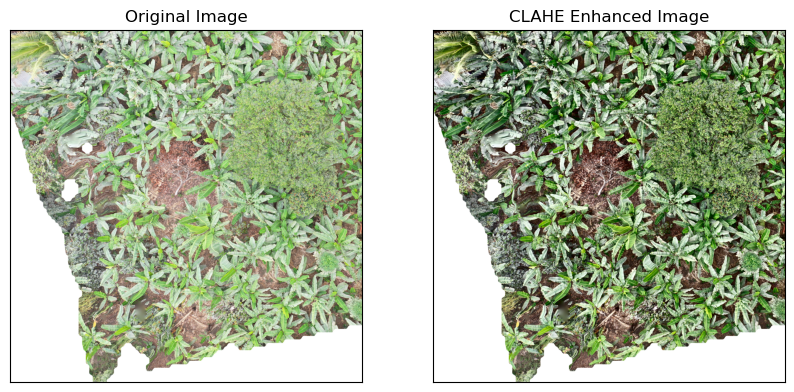

Original Metrics:
{'brightness': 178.3105091875, 'contrast': 54.49212693689779, 'edge_intensity': 2115309.0}
Enhanced Metrics:
{'brightness': 145.4155628125, 'contrast': 81.02149935965379, 'edge_intensity': 2605514.0}


In [30]:
clahe_image = du.clahe(test_image)
du.display_images(test_image, clahe_image, 'CLAHE Enhanced Image', baseline_metrics)

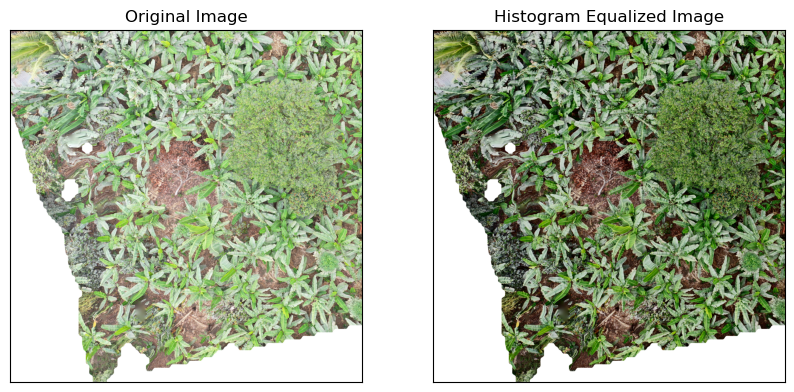

Original Metrics:
{'brightness': 178.3105091875, 'contrast': 54.49212693689779, 'edge_intensity': 2115309.0}
Enhanced Metrics:
{'brightness': 132.162860875, 'contrast': 78.98173485503087, 'edge_intensity': 2372809.0}


In [31]:
histo = du.equalize_histogram(test_image)
du.display_images(test_image, histo, 'Histogram Equalized Image', baseline_metrics)

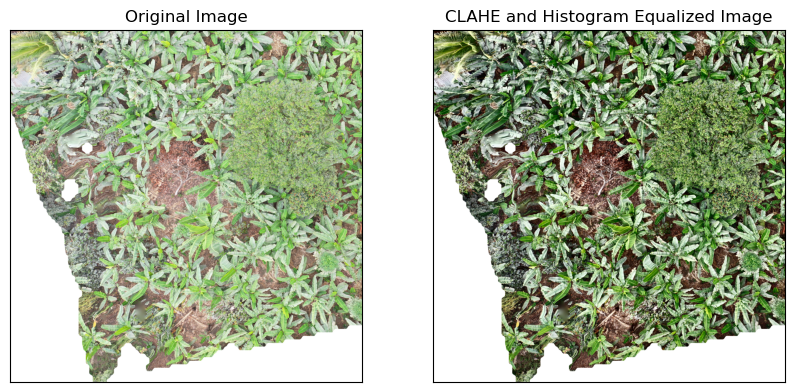

Original Metrics:
{'brightness': 178.3105091875, 'contrast': 54.49212693689779, 'edge_intensity': 2115309.0}
Enhanced Metrics:
{'brightness': 141.5060433125, 'contrast': 83.10483960473276, 'edge_intensity': 2603743.0}


In [32]:
both = du.clahe(img = histo)
du.display_images(test_image, both, 'CLAHE and Histogram Equalized Image', baseline_metrics)

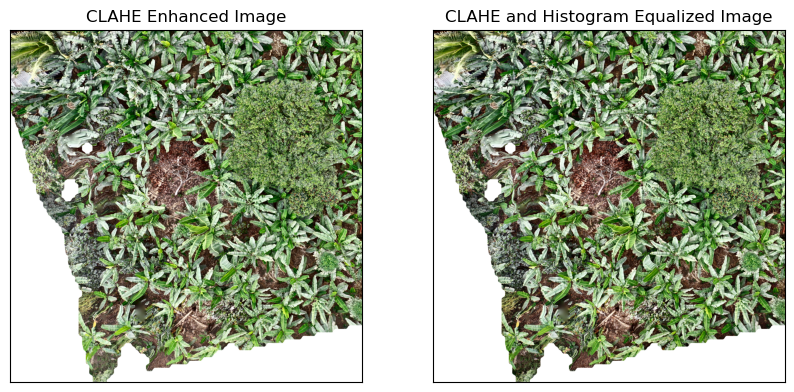

Original Metrics:
{'brightness': 178.3105091875, 'contrast': 54.49212693689779, 'edge_intensity': 2115309.0}
Enhanced Metrics:
{'brightness': 141.5060433125, 'contrast': 83.10483960473276, 'edge_intensity': 2603743.0}


In [33]:
du.display_images(clahe_image, both, 'CLAHE and Histogram Equalized Image', baseline_metrics, original_title='CLAHE Enhanced Image')

### Brightness

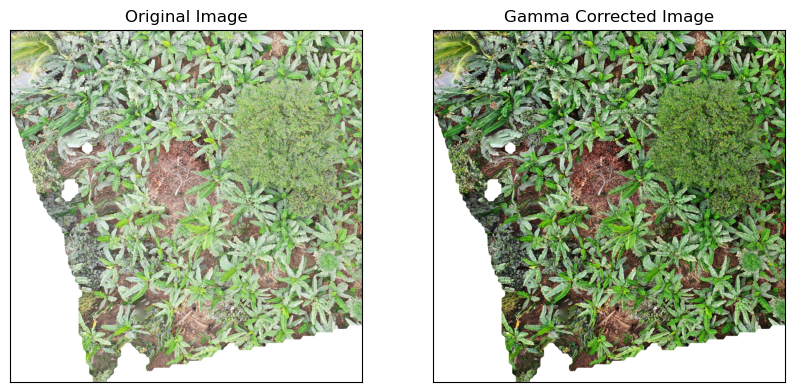

Original Metrics:
{'brightness': 178.3105091875, 'contrast': 54.49212693689779, 'edge_intensity': 2115309.0}
Enhanced Metrics:
{'brightness': 137.10326425, 'contrast': 73.83354168326667, 'edge_intensity': 2304231.0}


In [34]:
gamma = du.gamma_correction(test_image, gamma=0.5) 
du.display_images(test_image, gamma, 'Gamma Corrected Image', baseline_metrics)

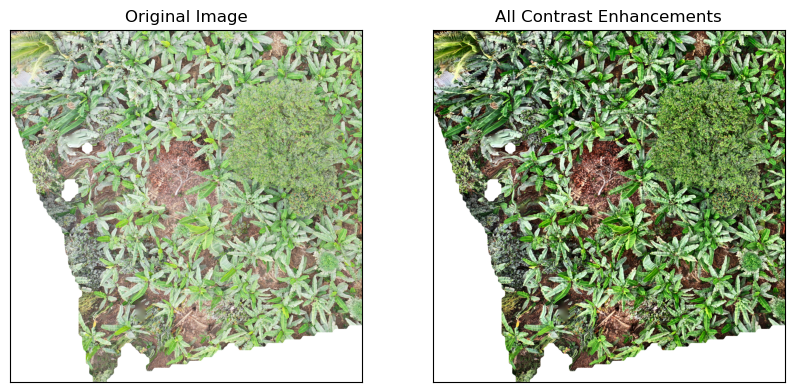

Original Metrics:
{'brightness': 178.3105091875, 'contrast': 54.49212693689779, 'edge_intensity': 2115309.0}
Enhanced Metrics:
{'brightness': 140.0602168125, 'contrast': 82.49044817582215, 'edge_intensity': 2594145.0}


In [35]:
histo = du.equalize_histogram(img = gamma)
everything = du.clahe(img = histo)
du.display_images(test_image, everything, 'All Contrast Enhancements', baseline_metrics)

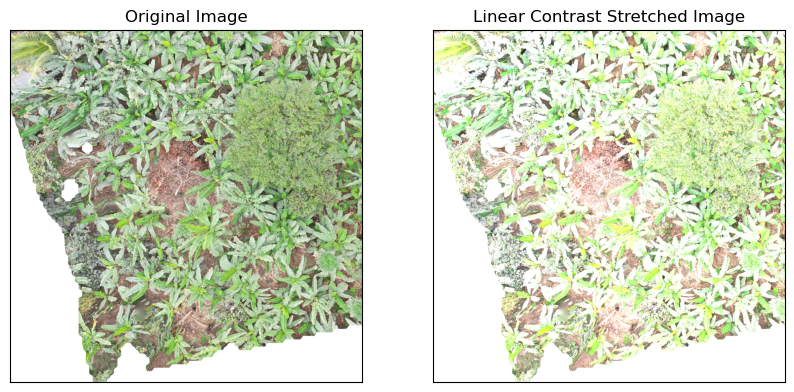

Original Metrics:
{'brightness': 178.3105091875, 'contrast': 54.49212693689779, 'edge_intensity': 2115309.0}
Enhanced Metrics:
{'brightness': 224.448815875, 'contrast': 44.37093002952888, 'edge_intensity': 1825280.0}


In [36]:
stretched = du.linear_contrast_stretching(test_image, alpha=1.5, beta=0)
du.display_images(test_image, stretched, 'Linear Contrast Stretched Image', baseline_metrics)

These metrics are not improving; will not use this filter 

### Sharpening

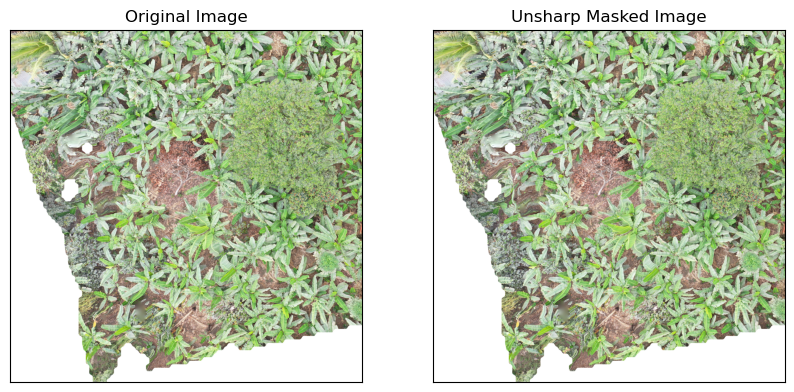

Original Metrics:
{'brightness': 178.3105091875, 'contrast': 54.49212693689779, 'edge_intensity': 2115309.0}
Enhanced Metrics:
{'brightness': 178.3105091875, 'contrast': 54.49212693689779, 'edge_intensity': 2115309.0}


In [37]:
sharpened_img = du.unsharp_mask(test_image, sigma=0.25, strength=3)
du.display_images(test_image, sharpened_img, 'Unsharp Masked Image', baseline_metrics)

This has done nothing; will not use this filter

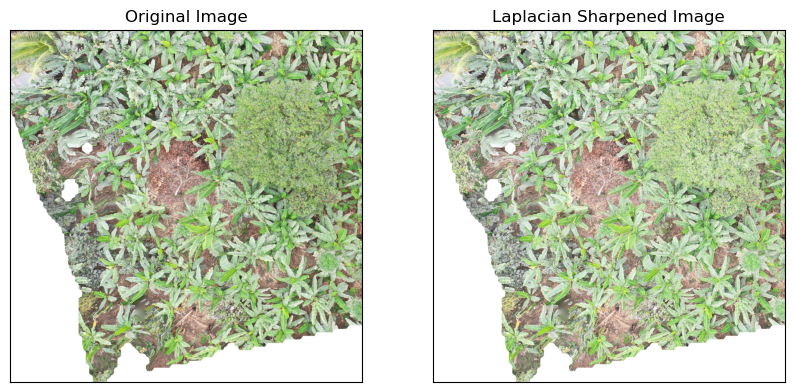

Original Metrics:
{'brightness': 178.3105091875, 'contrast': 54.49212693689779, 'edge_intensity': 2115309.0}
Enhanced Metrics:
{'brightness': 190.8981611875, 'contrast': 50.30058440683133, 'edge_intensity': 2448023.0}


In [38]:
laplacian = du.laplacian_sharpening(test_image)
du.display_images(test_image, laplacian, 'Laplacian Sharpened Image', baseline_metrics)

### Noise Reduction 

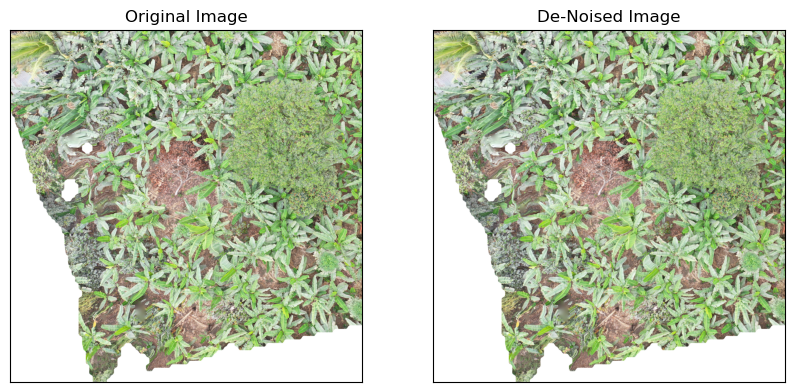

Original Metrics:
{'brightness': 178.3105091875, 'contrast': 54.49212693689779, 'edge_intensity': 2115309.0}
Enhanced Metrics:
{'brightness': 178.310638375, 'contrast': 52.94173996644785, 'edge_intensity': 1406542.0}


In [39]:
denoised = du.denoise(test_image)
du.display_images(test_image, denoised, 'De-Noised Image', baseline_metrics)

This did seem to make things worse, but could be a good first step. I will try with and without in my final enhancements. 

### Selecting final enhancements 

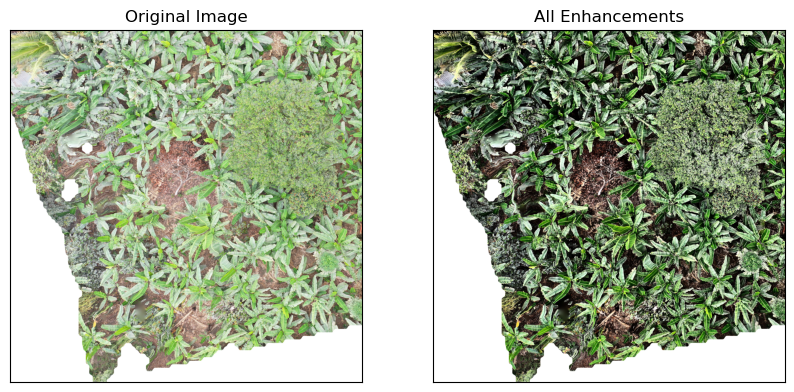

Original Metrics:
{'brightness': 178.3105091875, 'contrast': 54.49212693689779, 'edge_intensity': 2115309.0}
Enhanced Metrics:
{'brightness': 129.428795625, 'contrast': 93.63383440128358, 'edge_intensity': 2922357.0}


In [40]:
all_enhanced = du.selected_enhancements(test_image)
du.display_images(test_image, all_enhanced, 'All Enhancements', baseline_metrics)

#### Now that I have isolated the filters I want, I am going to apply them to 3 random images

In [8]:
#commenting this out because visualizing makes this file too big for upload
#du.visualize_3_images(final, enhance=True)

### Filter out images containing more than 80% white area 

In [42]:
culled_df = du.remove_white_area_images(final)

Image at data/tiles/Carlos Vera Arteaga RGB_15_11297_11053_15297_15053.png has more than 80% white area. Removing from dataset.
Image at data/tiles/Flora Pluas RGB_18_11400_11400_15400_15400.png has more than 80% white area. Removing from dataset.
Image at data/tiles/Flora Pluas RGB_19_11400_11578_15400_15578.png has more than 80% white area. Removing from dataset.
Image at data/tiles/Leonor Aspiazu RGB_0_0_0_4000_4000.png has more than 80% white area. Removing from dataset.
Image at data/tiles/Leonor Aspiazu RGB_15_11400_9855_15400_13855.png has more than 80% white area. Removing from dataset.
Image at data/tiles/Leonor Aspiazu RGB_19_13134_9855_17134_13855.png has more than 80% white area. Removing from dataset.
Image at data/tiles/Nestor Macias RGB_0_0_0_4000_4000.png has more than 80% white area. Removing from dataset.
Image at data/tiles/Nestor Macias RGB_15_11003_9024_15003_13024.png has more than 80% white area. Removing from dataset.


### Add a unique id column to dataframe

In [43]:
#add a column to the dataset with the unique id
culled_df['unique_id'] = range(1, len(culled_df) + 1)

/var/folders/ym/hz9zm7z56_z32pf0g7q1mxdw0000gp/T/ipykernel_26163/506864077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  culled_df['unique_id'] = range(1, len(culled_df) + 1)


## Save processed images and final dataset 

In [44]:
#save final_sm as a separate csv file
culled_df.to_csv('csv_files/final_dataset_filtered.csv', index=False)

In [45]:
#saves all the enhanged images to a new folder within data/tiles called processed 
du.apply_enhancements(culled_df)

## Comparing differences in species representation before and after culling

In [47]:
species_rep_before = final['name'].value_counts()
species_rep_after = culled_df['name'].value_counts()

In [54]:
#combining the two dataframes into a single one

compare_df = pd.DataFrame({'species_rep_before': species_rep_before, 'species_rep_after': species_rep_after}).fillna(0)
#add a column with the percentage of species lost
compare_df['percentage_lost'] = (compare_df['species_rep_before'] - compare_df['species_rep_after'])/compare_df['species_rep_before']
#refactor percentage_lost to be a percentage and round to 2 decimal places
compare_df['percentage_lost'] = round(compare_df['percentage_lost']*100, 2)

#make species_rep_after an integer
compare_df['species_rep_after'] = compare_df['species_rep_after'].astype(int)

#sort the table by highest species after 
compare_df = compare_df.sort_values(by='species_rep_after', ascending=False)

In [55]:
compare_df.head(5)

species_rep_before  species_rep_after  percentage_lost
name                                                                 
Cacao                        2042               2021             1.03
Musacea                      1504               1495             0.60
Guaba                         597                590             1.17
Mango                          89                 89             0.00
Otra variedad                  86                 85             1.16

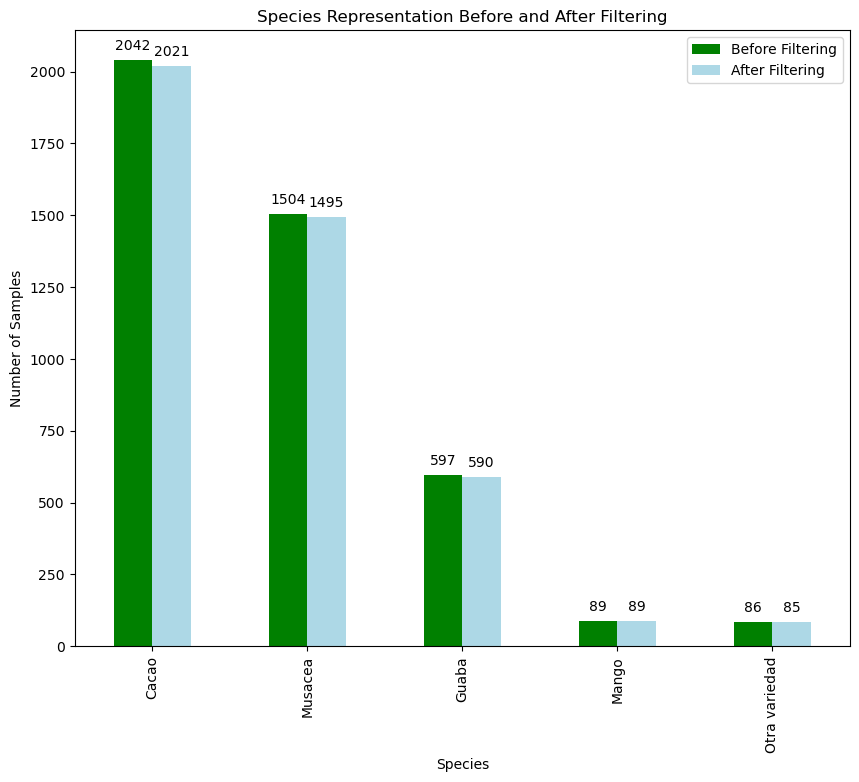

In [67]:
# Plotting the species representation before and after filtering

#only do the top 5 species

compare_df_plot = compare_df.head(5)

# Plot the bars with lighter green and blue colors
ax = compare_df_plot[['species_rep_before', 'species_rep_after']].plot(kind='bar', 
                                                                       figsize=(10, 8), 
                                                                       color=['green', 'lightblue'])

# Add the values at the top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

plt.title('Species Representation Before and After Filtering')
plt.xlabel('Species')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.legend(['Before Filtering', 'After Filtering'])
plt.show()

